# Compare several simulation results

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import setup
import init as init
from utilities import MyLabel, single_legend, stamp, projected_scatter
from pop_plot import sig_plot_cumulative


plt.style.use('seaborn-talk') # Make the labels readable
plt.style.use('seaborn-poster') # Bigger - Make the labels readable - bug with normal x marker !!!

## Define data and tags 

In [2]:
def define_set(folder, tag, debug=False):
    file = init.create_csv(file=None, datafile=Path(folder,"data.txt"),debug=False)
    (grb, gn0, gs0, gn, gs, gb) = init.get_data(file, debug=debug)
    init.sanity_check(file, grb, gn0, gs0, gn, gs, gb, debug=debug)    

    eff_lvl = init.get_eff_lvl(grb) # Effective det_level
    fullpop = pd.concat([gn0,gs0,gb],axis=0) # Full population
    print(" Effective CL cut = ",eff_lvl)
    
    return (grb, gn0, gs0, gn, gs, gb, fullpop, eff_lvl)

+======================== Sanity checks =========================+
 Estimated min altitude in  North  : 24.0
 Estimated min altitude in  South  : 24.0


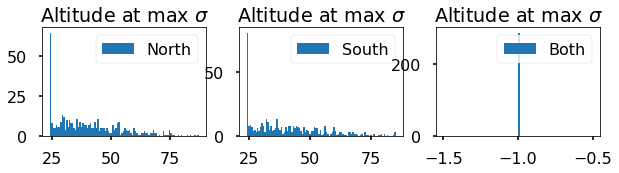

>>> Read configuration from  \\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\output\strictmoonveto\delays\pop_vis24_strictmoonveto-100iter-noacc-nodelay\config_pop_vis24_strictmoonveto-100iter-noacc-nodelay.yaml
 Estimated total delay in  North  : 2.7
 Estimated total delay in  South  : 2.27
+================================================================+
 Effective CL cut =  90.0


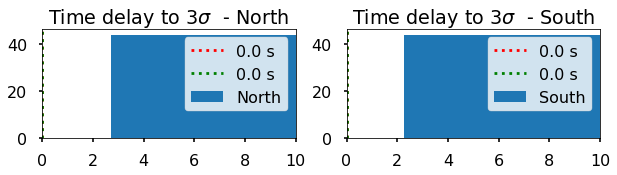

In [3]:
debug = False
### Set 1
# tag1 = "Omega"
# folder1 = "../../../output/strictmoonveto/pop_vis24_strictmoonveto-100iter-noacc/" 
tag1 = "No prompt, no delay"
folder1 = "../../../output/strictmoonveto/delays/pop_vis24_strictmoonveto-100iter-noacc-nodelay/" 

(grb1, gn01, gs01, gn1, gs1, gb1, fullpop1, eff_lvl1) = define_set(folder1,tag1, debug=debug)

+======================== Sanity checks =========================+
 Estimated min altitude in  North  : 24.0
 Estimated min altitude in  South  : 24.0


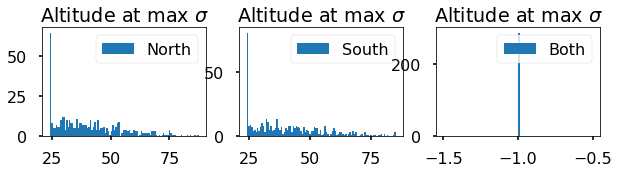

>>> Read configuration from  \\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\output\strictmoonveto\delays\pop_vis24_strictmoonveto-100iter-noacc-prompt-nodelay\config_pop_vis24_strictmoonveto-100iter-noacc-prompt-nodelay.yaml
 Estimated total delay in  North  : 2.68
 Estimated total delay in  South  : 2.34
+================================================================+
 Effective CL cut =  90.0


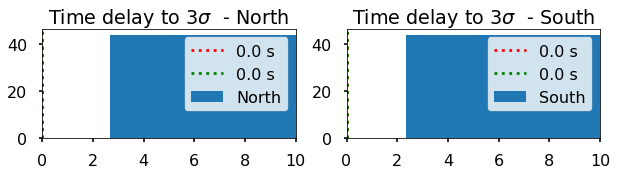

In [4]:
### Set 2
#tag2 = "data 2"
# folder2 = "../../../output/pop_vis24_fullmoonveto-1000iter-noacc/" 
# tag2 = "No delay"
# folder2 = "../../../output/pop_vis24_fullmoonveto-100iter-noacc-nodelay/" 
# tag2 = "old"
# folder2 = "../../../output/strictmoonveto/Plenary_20211129/pop_vis24_strictmoonveto-100iter-noacc/" 
# tag2 = "Ref+prompt"
# folder2 = "../../../output/strictmoonveto/pop_vis24_strictmoonveto-100iter-noacc-prompt/" 
# tag2 = "Alpha"
# folder2 = "../../../output/toberedone/prod5-alpha/pop_vis24_strictmoonveto-100iter-noacc-prod5/" 
tag2 = "Prompt, no delay"
folder2 = "../../../output/strictmoonveto/delays/pop_vis24_strictmoonveto-100iter-noacc-prompt-nodelay/" 
(grb2, gn02, gs02, gn2, gs2, gb2, fullpop2, eff_lvl2) = define_set(folder2,tag2, debug=debug)

# Find 5 sigma detection differences in the two population

In [5]:
print("*** ",tag1)
init.rate(grb1,nyears=44)
print("*** ",tag2)
init.rate(grb2,nyears=44)

***  No prompt, no delay

 ------------------------------------------------------------------------------------------------------
 Normalized to 44 years
 ------------------------------------------------------------------------------------------------------
 Rate :               N               S           Nonly           Sonly            Both           Total
 ------  --------------  --------------  --------------  --------------  --------------  --------------
 Vis. :   448.0 +- 21.2   452.0 +- 21.3   160.0 +- 12.6   164.0 +- 12.8   288.0 +- 17.0   612.0 +- 24.7
      :    10.2 +-  0.5    10.3 +-  0.5     3.6 +-  0.3     3.7 +-  0.3     6.5 +-  0.4    13.9 +-  0.6
 @trig:      56   12.5%      50   11.1%      16   10.0%      16    9.8%       0    0.0%       0    0.0%
 ------  --------------  --------------  --------------  --------------  --------------  --------------
 Ana. :   448.0 +- 21.2   452.0 +- 21.3   160.0 +- 12.6   164.0 +- 12.8   288.0 +- 17.0   612.0 +- 24.7
      :    10.

In [6]:
first1 = True
first2 = True
for (i1, g1), (i2, g2) in zip(grb1.iterrows(), grb2.iterrows()):
    
    def show():
        print(" {:8s} {:5s} 1: sigmx={:5.1f} +/-{:5.1f} * CL={:5d} * vis={:2d} * err={:5d}"
              .format(g1["name"], g1.site, g1.sigmx, g1.esigmx, g1.d5s,g1.vis,g1.err))        
        print(" {:8s} {:5s} 2:       {:5.1f} +/-{:5.1f}      {:5d} *     {:2d} *     {:5d}"
              .format(" "," ",g2.sigmx, g2.esigmx,  g2.d5s,g2.vis,g2.err)) 
        return
    
    if (g1.d5s >= eff_lvl1 and g2.d5s < eff_lvl2) :
        if (first1):
            print("Error : detected in 1 not in 2")
            first1 = False
        show()
    
    if (g1.d5s < eff_lvl1 and g2.d5s >= eff_lvl2) :
        if (first2):
            print("Error : detected in 2 not in 1")
            first2 = False
        show()
print("All done!")

All done!


# Check differences in visibility

In [7]:
namelist = set(grb1["name"].values)
count = {"North":0, "South":0, "Both":0}
for name in namelist:
#     print("check : ",name)
    for loc in ["North","South","Both"]:
        mask1 = (grb1["name"] == name) & (grb1.site == loc)
        mask2 = (grb2["name"] == name) & (grb2.site == loc)
        if grb1[mask1].err.values[0] != grb2[mask2].err.values[0] : 
            print("{:10s} {:5s} err1={:3d} err2={:3d}"
                  .format(name, loc,grb1[mask1].err.values[0],grb2[mask2].err.values[0]))
            count[loc]+=1
print(" Differences between the 2 populations :",count)

 Differences between the 2 populations : {'North': 0, 'South': 0, 'Both': 0}


In [8]:
###-------------------------------------------------------------------------------------------------
def var_plot(var1, var2, tag=["o","o"],varmin=None, varmax= None, 
             nbin=100,xscale="log",yscale="log",xlabel=""):
    
    if varmin == None:
        varmin = min(min(var1),min(var2))
    if varmax == None:
        varmax = max(max(var1),max(var2))
    print("min = ",varmin," max=",varmax)    
    
    mask1 = (var1<=varmax) & (var1>=varmin)
    mask2 = (var2<=varmax) & (var2>=varmin)
    
    fig, (axa, axb) = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
    n, bins, p = axa.hist(var1[mask1],bins=nbin,alpha=0.5,
                          label=MyLabel(var1[mask1],tag[0]))

    axa.hist(var2[mask2],bins=bins,alpha=0.5,
             label=MyLabel(var2[mask2],tag[1]))
    
    axa.set_xscale(xscale)
    axa.set_yscale(yscale)
    axa.set_xlabel(xlabel)
    axa.legend()
    
    axb.hist(var2[mask2]/var1[mask1],bins=nbin,alpha=0.5,
                          label=MyLabel(var2[mask2]/var1[mask1],tag[1]+"/"+tag[0]))
    axb.set_xlabel(xlabel+ " ratio")
    axb.set_yscale(yscale)
    axb.legend()
    return
###-------------------------------------------------------------------------------------------------    
def var_scatter(var1, var2, tag=["o","o"],
                varmin=None, varmax= None, 
                nbin=100,xscale="log",yscale="log", ax =None):

    if len(var1) != len(var2):
        print(" Set 1 : ",len(var1))
        print(" Set 2 : ",len(var2))
        print(" Samples should have the same size !")
        return 
    if varmin == None:
        varmin = min(min(var1),min(var2))
    if varmax == None:
        varmax = max(max(var1),max(var2))
    print("min = ",varmin," max=",varmax)
    mask1 = (var1<=varmax) & (var1>varmin)
    mask2 = (var2<=varmax) & (var2>varmin)
    #fig, (axa,axb, axc) = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
    if ax==None: fig, axa = plt.subplots(nrows=1,ncols=1,figsize=(7,7))

    ax.scatter(var1,var2,marker="+")
    ax.plot([varmin,varmax],[varmin,varmax],ls=":",color="red")
    ax.axvline(3,label="$ 3 \sigma$",color="tab:orange",ls=":")
    ax.axhline(3,label="$ 3 \sigma$",color="tab:orange",ls=":")
    ax.axvline(5,label="$ 5 \sigma$",color="tab:green",ls=":")
    ax.axhline(5,label="$ 5 \sigma$",color="tab:green",ls=":")
    ax.set_xlabel(tag[0])
    ax.set_ylabel(tag[1])
    ax.set_xlim(varmin,varmax)
    ax.set_ylim(varmin,varmax)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)

    import collections
    handles, labels = ax.get_legend_handles_labels()
    by_label = collections.OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

    return ax    

min =  0.013687938655386414  max= 7.828536295335388


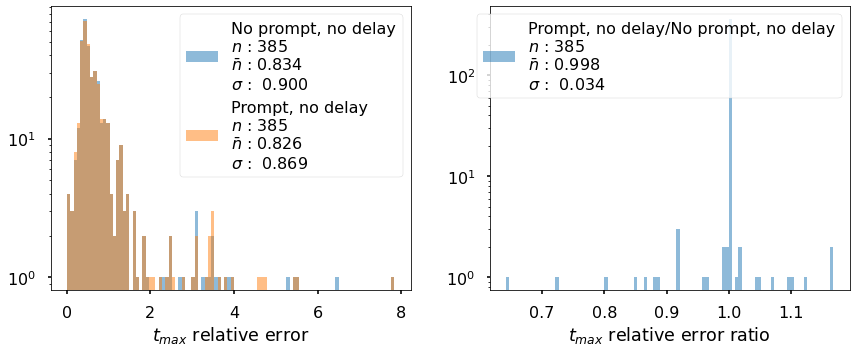

In [9]:
nmin=0
nmax=3000
var1 = gs1[nmin:nmax][gs1.etmx>0].etmx/gs1[nmin:nmax].tmx
var2 = gs2[nmin:nmax][gs2.etmx>0].etmx/gs2[nmin:nmax].tmx
# var1 = gs1[nmin:nmax].etmx
# var2 = gs2[nmin:nmax].etmx
# var1 = gs01[nmin:nmax].sigmx
# var2 = gs02[nmin:nmax].sigmx
var_plot(var1, var2,tag=[tag1,tag2],xscale="linear",yscale="log",xlabel="$t_{max}$ relative error")
plt.tight_layout()

min =  0.1  max= 1783.8


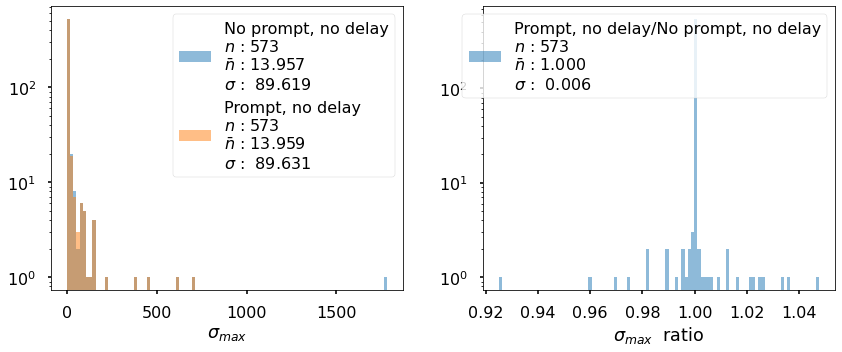

In [10]:
nmin=0
nmax=3000
var1 = fullpop1[nmin:nmax][fullpop1.sigmx>0].sigmx
var2 = fullpop2[nmin:nmax][fullpop2.sigmx>0].sigmx
var_plot(var1, var2,tag=[tag1,tag2],xscale="linear",yscale="log",xlabel="$\sigma_{max}$ ")
plt.tight_layout()

min =  263.21  max= 156272.06
 Set 1 :  406
 Set 2 :  406


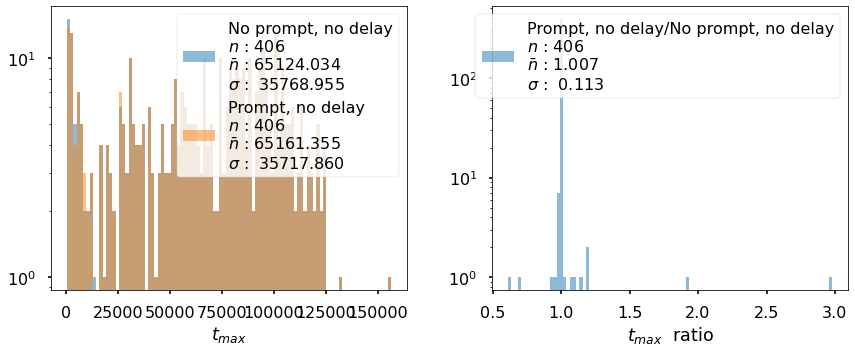

In [11]:
nmin=0
nmax=3000
var1 = gs1[nmin:nmax][gs1.sigmx>0].tmx
var2 = gs2[nmin:nmax][gs2.sigmx>0].tmx

var_plot(var1, var2,tag=[tag1,tag2],xscale="linear",yscale="log",xlabel="$t_{max}$ ")
print(" Set 1 : ",len(var1))
print(" Set 2 : ",len(var2))
plt.tight_layout()

# Compare sigma max on all sites

min =  0.1  max= 703.6
min =  0.1  max= 1783.8
min =  0.2  max= 1783.8


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

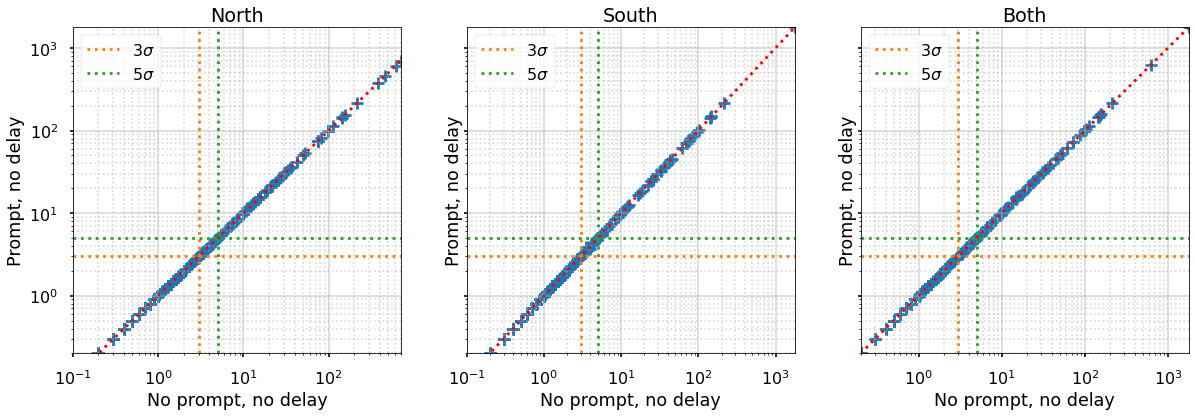

In [12]:
nmin=0
nmax=3000
sigmin=0
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6), sharey=True)

for ax0, g1, g2, tag in zip(ax, [gn1, gs1, gb1], [gn2, gs2, gb2], ["North", "South", "Both"]):
    var1 = g1[nmin:nmax][g1.sigmx>sigmin].sigmx
    var2 = g2[nmin:nmax][g2.sigmx>sigmin].sigmx
    var_scatter(var1, var2,tag=[tag1,tag2],xscale="log",yscale="log", ax=ax0)
    ax0.set_title(tag)
    ax0.grid(which="minor",axis="both",ls=":",alpha=0.5)
    ax0.grid(which="major",axis="both",ls="-",alpha=0.5)
plt.tight_layout

# Compare execess counts

min =  0.4  max= 186632.2
min =  1.0  max= 903180.2
min =  1.0  max= 903180.2


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

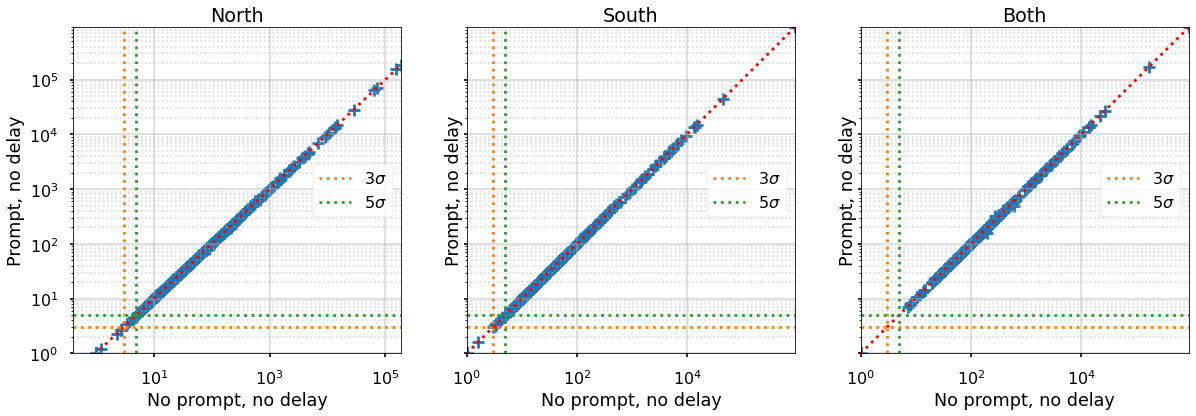

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6), sharey=True)

for ax0, g1, g2, title in zip(ax, [gn1, gs1, gb1], [gn2, gs2, gb2], ["North", "South", "Both"]):
    # Put negative excess to 1 (use of a log scale)
    n1 = np.array([n if n>0 else 1 for n in g1.nexmx])
    n2 = np.array([n if n>0 else 1 for n in g2.nexmx])
    var_scatter(n1, n2,tag=[tag1,tag2],xscale="log",yscale="log", ax=ax0)
    ax0.set_title(title)
    ax0.grid(which="minor",axis="both",ls=":",alpha=0.5)
    ax0.grid(which="major",axis="both",ls="-",alpha=0.5)
plt.tight_layout

C:\Users\stolar\AppData\Local\Continuum\anaconda3\gpy0.18.2\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


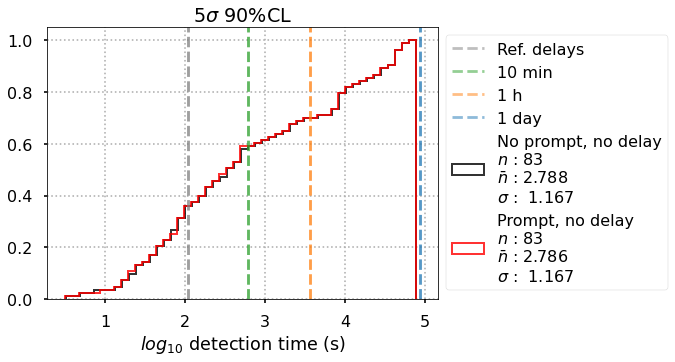

In [21]:
### Cumulative 5 sigma 90% CL - No delay and reference

varlist  = [np.log10(fullpop1.t5s), np.log10(fullpop2.t5s)] # Go to hours
masklist = [(fullpop1.d5s>eff_lvl1), (fullpop2.d5s>eff_lvl2),]
collist = ["black","red"] # collist = ["black","red","purple","blue"]
lbllist = [tag1, tag2] # lbllist = [tag1, tag2, tag3, tag4]

fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(7, 5))
for var, mask, col, lbl in zip(varlist,masklist,collist,lbllist):

    sig_plot_cumulative(var,mask=mask,title="$5\sigma$ 90%CL", 
                        ax=ax, xlabel="$log_{10}$ detection time (s)",
                        edgecolor=col,label=MyLabel(var[mask],label=lbl),alpha=0.8)
single_legend(ax, bbox_to_anchor=[1,1])
# stamp(file,axis=fig,where="left")

C:\Users\stolar\AppData\Local\Continuum\anaconda3\gpy0.18.2\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


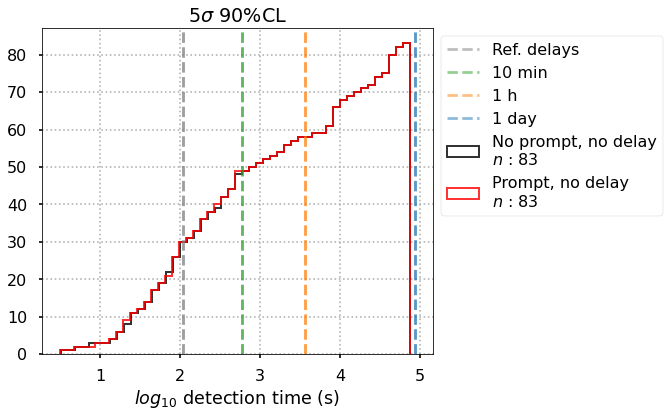

In [22]:
### Cumulative 5 sigma 90% CL - several delays
density = False
varlist  = [np.log10(fullpop1.t5s), 
            np.log10(fullpop2.t5s),
           ] #np.log10(fullpop3.t5s), np.log10(fullpop4.t5s)
           
masklist = [(fullpop1.d5s>eff_lvl1),
            (fullpop2.d5s>eff_lvl2)]
            #(fullpop3.d5s>eff_lvl3), (fullpop4.d5s>eff_lvl4)
collist = ["black","red","purple","blue"]
lbllist = [tag1, tag2] #, tag3, tag4]

fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(7, 6))
for var, mask, col, lbl in zip(varlist,masklist,collist,lbllist):

    sig_plot_cumulative(var,mask=mask,title="$5\sigma$ 90%CL", 
                        ax=ax, xlabel="$log_{10}$ detection time (s)", density=density,
                        edgecolor=col,label=MyLabel(var[mask],label=lbl,stat=None),
                        alpha=0.8)
single_legend(ax, bbox_to_anchor=[1,1])
# stamp(file,axis=fig,where="left")

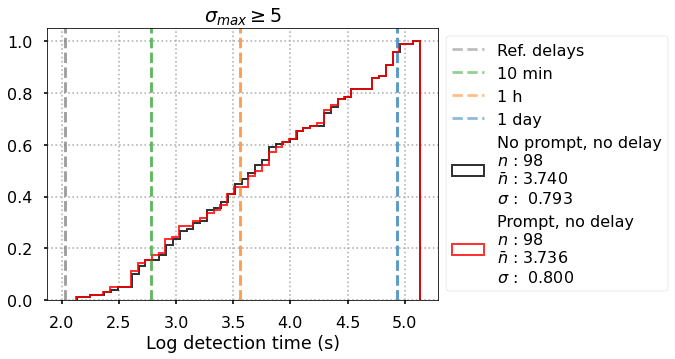

In [23]:
### Cumulative sigma max > 5 sigma 
varlist  = [np.log10(fullpop1.tmx), np.log10(fullpop2.tmx)] # Go to hours
masklist = [(fullpop1.tmx>=0) & (fullpop1.sigmx>=5),
            (fullpop2.tmx>=0) & (fullpop2.sigmx>=5) ]

fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(7, 5))
for var, mask, col, lbl in zip(varlist,masklist,collist,lbllist):

    sig_plot_cumulative(var,mask=mask,title="$\sigma_{max} \geq 5$", 
                        ax=ax, xlabel="Log detection time (s)",
                        edgecolor=col,label=MyLabel(var[mask],label=lbl),alpha=0.8)
# stamp(file,axis=fig,where="left")
single_legend(ax, bbox_to_anchor=[1,1])